## Винеровский процесс

### Упражнение 1

Пусть $(W_t)_{t \in \mathbb{R}_+}$ -- Винеровский процесс. Зададим процесс

$$
A_t := \frac{1}{t} \int_{0}^t W_s ds.
$$

Найдите ковариационную функцию процесса. Является ли процесс стационарным в широком смысле?

Является ли процесс стационарным в узком смысле?

**РЕШЕНИЕ**

$E(W_t) = m = E(A_t)$

$A_t-E(A_t) = \frac{1}{t}\int_0^t W_s - E(W_s)$

$cov(A_t, A_{t+\delta}) = E(A_t-m)(A_{t+\delta}-m) = E[\frac{1}{t}\int_0^t W_s - E(W_s)ds\frac{1}{t+\delta}\int_0^{t+\delta} W_s - E(W_s)ds] = \\ = \frac{1}{t(t+\delta)}\int_0^{t+\delta}\int_0^{t} cov(W_s, W_r) ds dr = \\ = \frac{1}{t(t+\delta)} \int_0^t [k(t+\delta-k) + k(t-k)] dk = \dfrac{1}{t(t+\delta)} \dfrac{2t^3+3{\delta}t^2}{6}$

Как видим, m = const, но ковариация не зависит от разности, не сокращается t. А значит процесс нестационарный в широком и узком смысле

## Оценка параметров в модели Блэка-Шоулза

В одной из первых классических финансовых моделей цены акций моделируются с помощью процесса геометрического Броуновского движения (GBM). Пусть $(W_t)_{t \in \mathbb{R}_+}$ -- Винеровский процесс, тогда процесс геометрического Броуновского движения задаётся как

$$
X_t = X_0 e^{(\mu-\sigma^2/2)t + \sigma W_t},
$$

$\mu$ -- параметр сноса (связан с безрисковой процентной ставкой),  $\sigma$ -- параметр волатильности (показывающий насколько интенсивно цена может колебаться, связан с активностью инвесторов). Ваша задача в этом упражнении построить первую модель для оценки параметров по имеющейся дискретной реализации процесса.

### Вывод формул для параметров

Пусть даны $X_0,X_{t_1}..,X_{t_n}$ -- часть траектории процесса, мы хотим подогнать параметры $\mu,\sigma$ в предположении, что наблюдения пришли из геометрического Броуновского движения. Обычная регрессия в данном случае нам не подойдёт, так как мы имеем дело с нелинейной моделью и наблюдения $X_i$ зависимы, но линейную модель можно получить с помощью простого трюка. Рассмотрим два сечения процесса и возьмём логарифм от каждого:

$$
\ln X_{t_k} = \ln X_0 + (\mu - \sigma^2/2)t_k + \sigma W_{t_k},
$$

$$
\ln X_{t_{k+1}} = \ln X_0 + (\mu - \sigma^2/2)t_{k+1} + \sigma W_{t_{k+1}}.
$$

Заметьте, что если мы вычтем из второго первое, то справа останется приращение Винеровского процесса (обозначили $h_{k+1}=t_{k+1} - t_k$):

$$
\ln X_{t_{k+1}} - \ln X_{t_{k}} -  (\mu - \sigma^2/2)h_{k+1} = \sigma (W_{t_{k+1} - W_{t_k}}).
$$

Так, в силу независимости и гауссовости приращений винеровского процесса мы теперь можем выписать функцию правдоподобия по аналогии с обычной моделью линейной регрессии и найти параметры $\mu,\sigma$, максимизируя её.

#### Функция правдоподобия

Пусть даны $t_0=0,t_1,..,t_n$ и $X_0,X_1,..,X_n$ (например, данные собранные на бирже). Выпишите функцию правдоподобия $L(\mu,\sigma)$ для модели, возьмите в конце логарифм, так как с ним будет удобнее работать.

**РЕШЕНИЕ**

$A_{t_{k+1}} = ln X_{t_{k+1}} - ln X_{t_k}$

$L(\mu, \sigma) = \prod p[\sigma(W_{t_{k+1}} - W_{t_k}) = A_{t_{k+1}} - (\mu - \sigma^2/2)h_{k+1}] = \\ = \prod \frac{1}{\sqrt{2\pi h_{k+1}}\sigma} \exp{-\dfrac{(\frac{A_{t_{k+1}} - (\mu - \sigma^2/2)h_{k+1}}{\sigma})^2}{2 h_{k+1}}}$

$ln L = const - \sum \dfrac{(A_{t_{k+1}} - (\mu - \sigma^2/2)h_{k+1})^2}{2 h_{k+1}\sigma^2} - n*ln(\sigma)= \\ = const - \sum \dfrac{A_{t_{k+1}}^2 - 2A_{t_{k+1}}\mu h_{k+1} + A_{t_{k+1}}\sigma^2h_{k+1} + \mu^2h_{k+1}^2-\mu\sigma^2h_{k+1}^2 + \sigma^4/4h_{k+1}^2}{2 h_{k+1}\sigma^2} - n*ln(\sigma)$

#### Вычисление производных

Вычислите производные функции $\ln L(\mu,\sigma)$.

**РЕШЕНИЕ**

$$
\partial_\mu \ln L = \sum \dfrac{2 A_{t_{k+1}}h_{k+1} - 2\mu h_{k+1}^2+\sigma^2h_{k+1}^2}{2 h_{k+1}\sigma^2} = \\ = \dfrac{ln X_n - ln X_0}{\sigma^2} - \mu\dfrac{t_n}{\sigma^2} + \dfrac{t_n}{2}
$$

$$
\partial_\sigma \ln L = \sum \dfrac{2 A_{t_{k+1}}^2 - 4A_{t_{k+1}}\mu h_{k+1} + 2\mu^2h_{k+1}^2-\sigma^4/2h_{k+1}^2}{2 h_{k+1}\sigma^3} - n \dfrac{1}{\sigma}= \\ = \sum (\dfrac{A^2}{h\sigma^3}) - \dfrac{2(ln X_n - ln X_0)\mu}{\sigma^3} + \dfrac{\mu^2t_n}{\sigma^3}- \dfrac{\sigma t_n}{4} - n \dfrac{1}{\sigma}
$$

#### Запись формул для $\mu,\sigma$

Найдите $\mu,\sigma$, приравняв производные к нулю (в этих точках функция действительно будет иметь максимум, проверяется вычислением матрицы Гессе, но здесь это делать не нужно).

**РЕШЕНИЕ**

$$
\mu = \dfrac{ln X_n - ln X_0}{t_n} + \dfrac{\sigma^2}{2}
$$

$\sigma$ получаем использовав $\mu$ полученный выше

$$
\sigma^2 = -1/n * \dfrac{(ln X_n - ln X_0)^2}{t_n} + 1/n\sum \dfrac{A_{t_{k+1}}^2}{h_{k+1}}
$$

Можно конечно пересчитать и $\mu$, но зачем

### Воплощение в коде

Теперь имплементируйте модель оценки, используйте для основы код ниже. Нам также понадобится для симуляции Винеровский процесс.

In [ ]:
def simulateWienerProcess(x0, ts, Ntraj):
    '''
    Simulates trajectories of Wiener process
    Input
    float x0 -- initial value
    float[] ts -- times
    int Ntraj -- number of trajectories to simulate
    Returns
    float[] of shape (Ntraj,len(ts))
    '''
    ts = np.array(ts)
    
    xs = [] #init
    for n in range(Ntraj):
        x = [x0]
        for i in range(1, len(ts)):
            x.append(np.random.normal() * np.sqrt(ts[i] - ts[i-1]) + x[-1])
        xs.append(np.array(x))
    return np.array(xs)
            

class GBMModel:
    '''
        Implements Geometric Brownian Motion, allowing for parameter estimation and simulations
    '''

    def __init__(self, mu=0, sigma=1):
        '''
        Input
        float mu -- drift parameter (if pre-defined)
        float sigma -- volatility (if pre-defined)
        '''
        self.mu=mu
        self.sigma=sigma


    def fit(self, xs, ts):
        '''
        Fits the parameters to the given time series
        Input
        float[] xs -- observations
        float[] ts -- times (same shape as xs)
        '''
        xs = np.array(xs)

        n = len(ts)
        h = ts[1:] - ts[:-1]
        
        xs = np.array(xs)
        
        A = np.log(xs[1:]) - np.log(xs[:-1])
        dx = np.log(xs[-1]) - np.log(xs[0])
        
        sigma2 = -1/n * (dx)**2/ts[-1] + 1/n*np.sum(A**2/h)
        self.sigma = np.sqrt(sigma2)
        
        self.mu = dx/ts[-1] + sigma2/2
        
        
    def predict(self, x0, t0, ts, confLevel=0):
        '''
        Predicts the value of the process at times ts>t0 given the value x0 at time t0 
        (THE INSTRUCTION IS GIVEN BELOW, CLOSER TO THE END OF THE NOTEBOOK)
        Input
        float x0 -- given price
        float t0 -- time at which the proce x0 is known
        float[] ts -- times where the prediction is required (ts>t0!!)
        float confLevel -- confidence level, set to be non-zero if confInterval is needed
        Returns
        float[] of shape (len(ts),) , predictions
        if confLevel!=0, 
        then returns  float[] (len(ts),), float[] (len(ts),), float[] (len(ts),) 
        which are predictions, confidenceLow, confidenceHigh    
        '''
        ts = np.array(ts)
        ts -= t0
        xs = x0 * np.exp(self.mu*ts)
        std = np.sqrt(x0**2 * np.exp(self.mu*ts*2) * (np.exp(self.sigma**2*ts) - 1))
        
        if confLevel:
            return xs, xs-1.96*std, xs+1.96*std
        return xs
    
    def simulate(self, x0, ts, Ntraj, confLevel=0):
        '''
        Simulates trajectories of GBM with set mu and sigma
        Input
        float x0 -- initial price
        float[] ts -- times
        int Ntraj -- number of trajectories to simulate
        float confLevel -- confidence level, set to non-zero if confInterval is needed
        Returns
        float[] of shape (Ntraj,len(ts)) , trajectories
        if confLevel!=0, 
        then returns  float[] (Ntraj,len(ts)), float[] (len(ts),), float[] (len(ts),) 
        which are trajectories, confidenceLow, confidenceHigh
        '''
        ts = np.array(ts)
        ts -= ts[0]
        
        w = simulateWienerProcess(0,ts,Ntraj)
        xs = x0 * np.exp((self.mu - self.sigma**2/2)*ts[None, :] + self.sigma*w)

        mean = x0 * np.exp(self.mu*ts)
        std = np.sqrt(x0**2 * np.exp(self.mu*ts*2) * (np.exp(self.sigma**2*ts) - 1))
        
        if confLevel:
            return xs, mean, mean-1.96*std, mean+1.96*std
        return xs


        #Used simulateWienerProcess to simulateW trajectories of Wiener process
        #Based on that, computed GBM
        #For confidence intervals used the exponentiated gaussian intervals of (mu-sigma^2/2)t + sigma W_t
    

В качестве теста, попробуйте нарисовать траектории Винеровского процесса и траектории геометрического броуновского движения для данных ниже.

Testing

In [ ]:
a=0
b=10
Nt=100
h=(b-a)/Nt
ts = np.arange(a,b+h/2,h)

mu=0.06
sigma=0.22
Ntraj=10
x0=15

gbm = GBMModel(mu,sigma)
gbmTrajs = gbm.simulate(x0,ts,Ntraj)
wienTrajs = simulateWienerProcess(x0,ts,Ntraj)

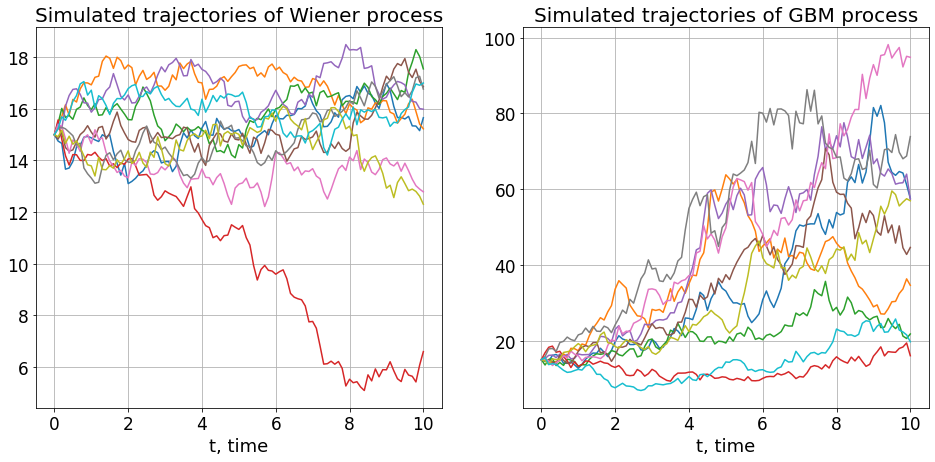

In [ ]:
#plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(16,7))

ax1.grid()
ax1.set_title('Simulated trajectories of Wiener process',fontsize=20)
ax1.set_xlabel('t, time',fontsize=18)
ax1.tick_params(axis='x', labelsize=17)
ax1.tick_params(axis='y', labelsize=17)
ax1.plot(ts,wienTrajs.T)

ax2.grid()
ax2.set_title('Simulated trajectories of GBM process',fontsize=20)
ax2.set_xlabel('t, time',fontsize=18)
ax2.tick_params(axis='x', labelsize=17)
ax2.tick_params(axis='y', labelsize=17)
ax2.plot(ts,gbmTrajs.T)

plt.show()

### Подгонка параметров GBM под данные

Загрузите датасет gbmData.pkl, который идёт вместе с ноутбуком и попробуйте оценить модель геометрического Броуновского движения для него. Нарисуйте график, на котором указаны точки данных, матожидание полученного процесса и доверительный интервал; пунктиром нарисуйте несколько реализаций процесса геометрического Броуновского движения.

In [ ]:
#YOUR CODE
import pickle

with open('gbmData.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
data.keys()

dict_keys(['ts', 'prices'])

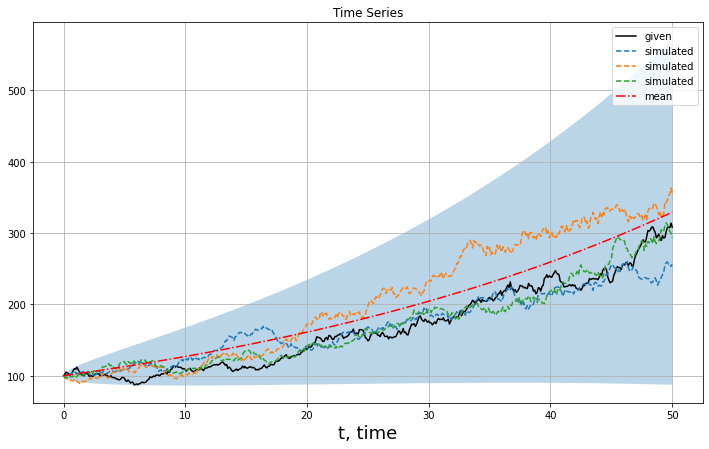

In [ ]:
f,ax = plt.subplots(figsize=(12,7))

ax.grid()
ax.set_title("Time Series")
ax.set_xlabel('t, time',fontsize=18)

ax.plot(data['ts'], data['prices'], color='black')

gbm = GBMModel()
gbm.fit(data['prices'], data['ts'])
gbmTrajs, mean, conf_low, conf_high = gbm.simulate(data['prices'][0], data['ts'], 3, confLevel=1)

# ax.plot(data['ts'], [gbm.mu] * len(data['ts']))

ax.plot(data['ts'], gbmTrajs.T, linestyle = '--')
ax.plot(data['ts'], mean, color='red', linestyle='-.')

ax.fill_between(data['ts'], conf_low, conf_high, alpha=0.3)

legend_arr = 'given', *['simulated'] * 3, 'mean'

ax.legend(legend_arr)

plt.show()
#plot given time series
#plot several simulated trajectories
#plot confidence intervals    

### Проверка качества предсказаний

Проверим, как хорошо делаются предсказания в полученной модели. Для этого попробуйте в разных местах ряда предсказать следующие 50 наблюдений.

Заметьте, что наилучший прогноз -- это

$$
\mathbb{E}[X_{t+h} \vert X_t] = X_t \mathbb{E}[ e^{(\mu - \sigma^2/2)h + \sigma W_h} ].
$$


Сравните предсказания GBMModel и тестовые значения, нарисуйте доверительные интервалы, чтобы понимать, насколько уверена модель. Насколько модель подходит для долгосрочного прогноза?

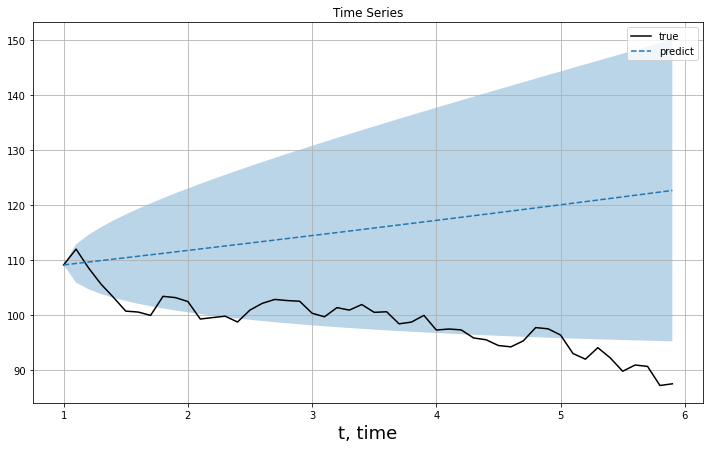

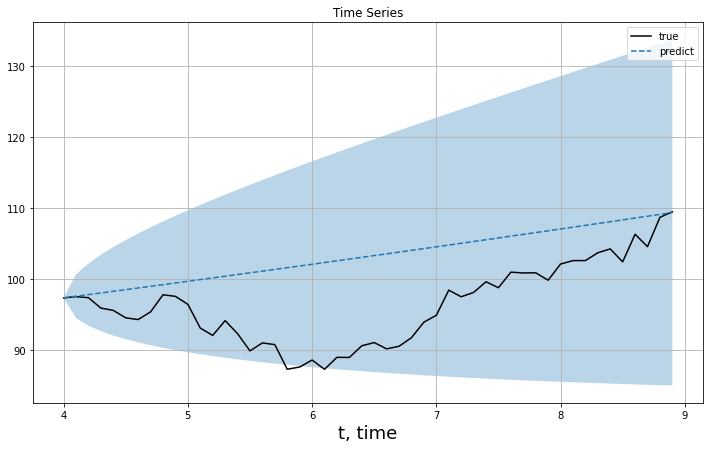

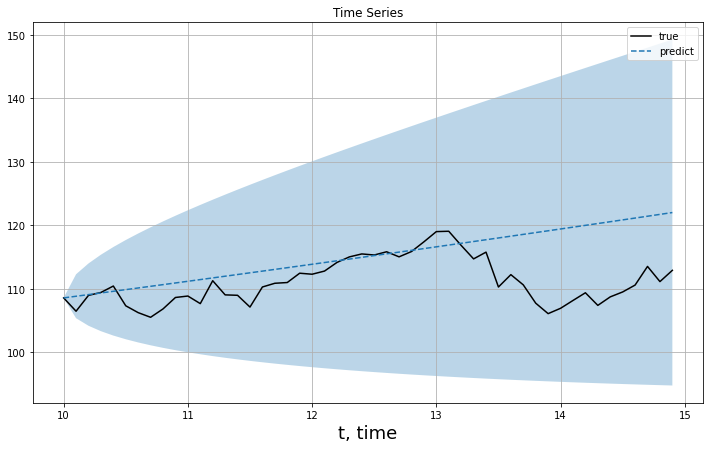

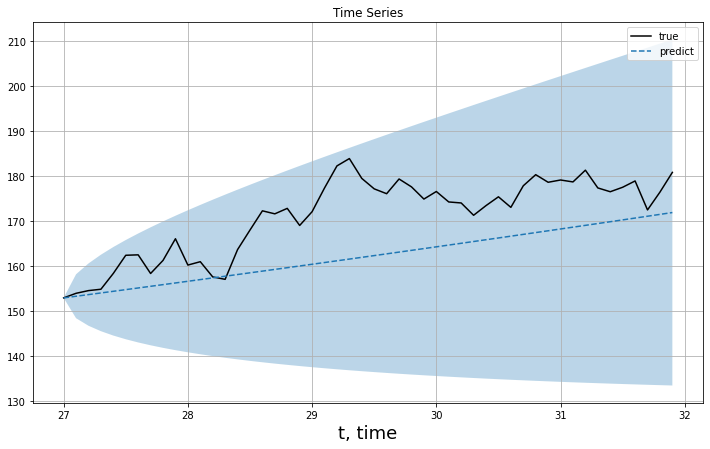

In [ ]:
n = 50
for start in [10, 40, 100, 270]:

    f,ax = plt.subplots(figsize=(12,7))

    ax.grid()
    ax.set_title("Time Series")
    ax.set_xlabel('t, time',fontsize=18)

    ax.plot(data['ts'][start:start+n], data['prices'][start:start+n], color='black')

    gbm = GBMModel()
    gbm.fit(data['prices'], data['ts'])
    gbmTrajs, conf_low, conf_high = gbm.predict(data['prices'][start], data['ts'][start], data['ts'][start:start+n], confLevel=1)

    ax.plot(data['ts'][start:start+n], gbmTrajs.T, linestyle = '--')

    ax.fill_between(data['ts'][start:start+n], conf_low, conf_high, alpha=0.3)

    legend_arr = 'true', 'predict'

    ax.legend(legend_arr)

    plt.show()

На самом деле, неплохой прогноз на 50 шагов. Но уже по первой понятно, что для долгосрочных прогнозах говорить неприходится. График прогноза на 50 щагов, а данном случае, это просто +- линейный тренд

#### Комментарий

Модель Блэка-Шоулза -- самая первая, самая простая и очень критикуемая, но её можно улучшать в разные стороны. Например, можно использовать изменчивые снос и волатильность, моделриуемые нелинейными функциями. Что касается волатильности, то волатильность очень часто моделируют с помощью отдельного случайного процесса, так как она сама очень изменчива. Мы вернёмся к этому вопросу ближе к концу курса. Долгосрочные прогнозы на такой модели делать непросто, потому что она не моделирует резкие скачки и шоки (траектории $X_t$ непрерывны почти наверное), но такие явления очень типичные для финансовых рядов. Это касательно экономических претензий.

Если говорить о математических и вычислительных, в нашей модели есть как минимум одна проблема, которая неочевидна с первого взгляда, но почти сразу возникает на практике. Волатильность оценивается очень качественно, но параметр сноса очень неустойчивый. Поэтому если на вход приходит не очень удачная (что бывает в финансах)  последовательность наблюдений, то снос точно оценить непросто и это является задачей исследовательского уровня. 